# Exercise 1.1.3: Conditional Entropy

Example:
"""
Consider a model where each pixel depends on its left neighbor.

P(pixel = 0) = P(pixel = 255) = 0.5 
P(pixel_i = pixel_{i-1}) = 0.9 
P(pixel_i ≠ pixel_{i-1}) = 0.1

Calculate:
1. H(pixel) - marginal entropy
2. H(pixel_i | pixel_{i-1}) - conditional entropy
3. How many bits saved by using conditional model?

1. Answer = 1 bit
2. Answer = 0.469 bits
3. Answer = 0.531 bits

In [8]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt

sys.path.append("../../..")
from src.compression.entropy import entropy
from src.compression.histogram import createnormalisedhistogram

In [9]:
def createsequence(n):
    values = [0,255]
    first_pixel = random.choice(values)
    numberarray = [first_pixel]
    psameaspredecessor = 0.9
    for i in range(0, n-1):
        if random.random() <= psameaspredecessor:
            current_value = numberarray[i]
            numberarray.append(current_value)
        else:
            index = values.index(numberarray[i])
            index = (index+1)%2
            numberarray.append(values[index])
    return np.array(numberarray)



In [10]:
array = createsequence(10000)
np.set_printoptions(threshold=np.inf)
print(array)

[255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255   0   0   0   0   0   0   0   0   0 255   0   0   0   0
   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255   0
 255 255 255 255 255 255 255   0   0   0   0   0   0   0 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
 255 255 255 255   0   0   0   0   0   0   0   0 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
   0   0   0   0 255 255 255 255 255 255 255 255 25

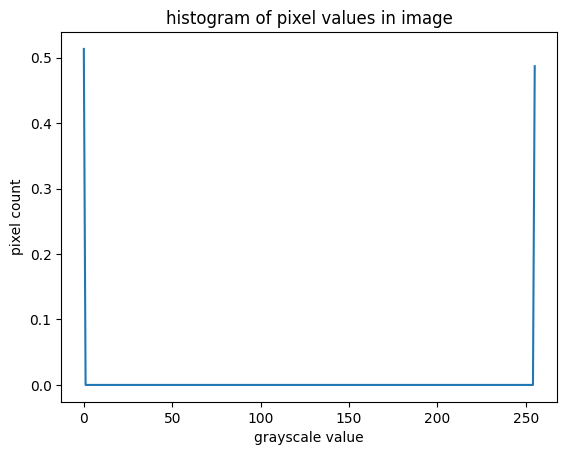

In [11]:
histogram = createnormalisedhistogram(array)


In [12]:
histentropy = entropy(histogram)
print(histentropy)

0.9994971912163815


In [13]:
samevalue = np.sum(array[1:] == array[:-1])
differentvalue = np.sum(array[1:] != array [:-1])
total = samevalue + differentvalue 

p_same = samevalue / total
p_different = differentvalue / total


print(p_same, p_different)

0.8978897889788979 0.10211021102110211


In [17]:
conditional_entropy = entropy(np.array([p_same, p_different]))
print(f"The conditional entropy is {conditional_entropy:.4f}")

The conditional entropy is 0.4756
